In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d blastchar/telco-customer-churn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 10.4MB/s]


In [ ]:
! unzip telco-customer-churn.zip -d /content/data

Archive:  telco-customer-churn.zip
  inflating: /content/data/WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
path="/content/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.dropna()
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = 0.0
df.loc[df['MonthlyCharges'] == ' ', 'MonthlyCharges'] = 0.0
df.loc[df['tenure'] == ' ', 'tenure'] = 0.0

In [ ]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

<ipython-input-14-eee77348da9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


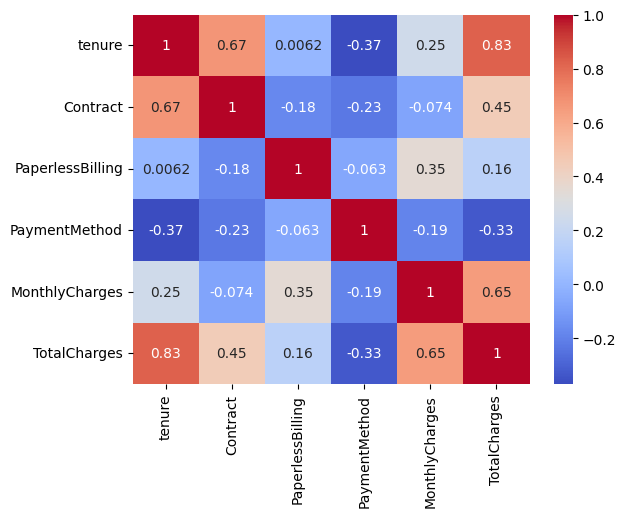

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
selected_cols = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
df = df[selected_cols]

In [ ]:
path="/content/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df1 = pd.read_csv(path)
df1.drop(columns= 'customerID', axis=1, inplace=True)
df1['Churn'] = np.where(df1['Churn'] == 'Yes', 1 ,0)
df1['Partner'] = np.where(df1['Partner'] == 'Yes', 1 ,0)
df1['Dependents'] = np.where(df1['Dependents'] == 'Yes', 1 ,0)
df1['PaperlessBilling'] = np.where(df1['PaperlessBilling'] == 'Yes', 1 ,0)

In [ ]:
cols = ['MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

In [ ]:
df1 = pd.get_dummies(df1, columns=cols)

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,No,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,Yes,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,Yes,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,No,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,Yes,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


<ipython-input-36-d982d0dd4140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

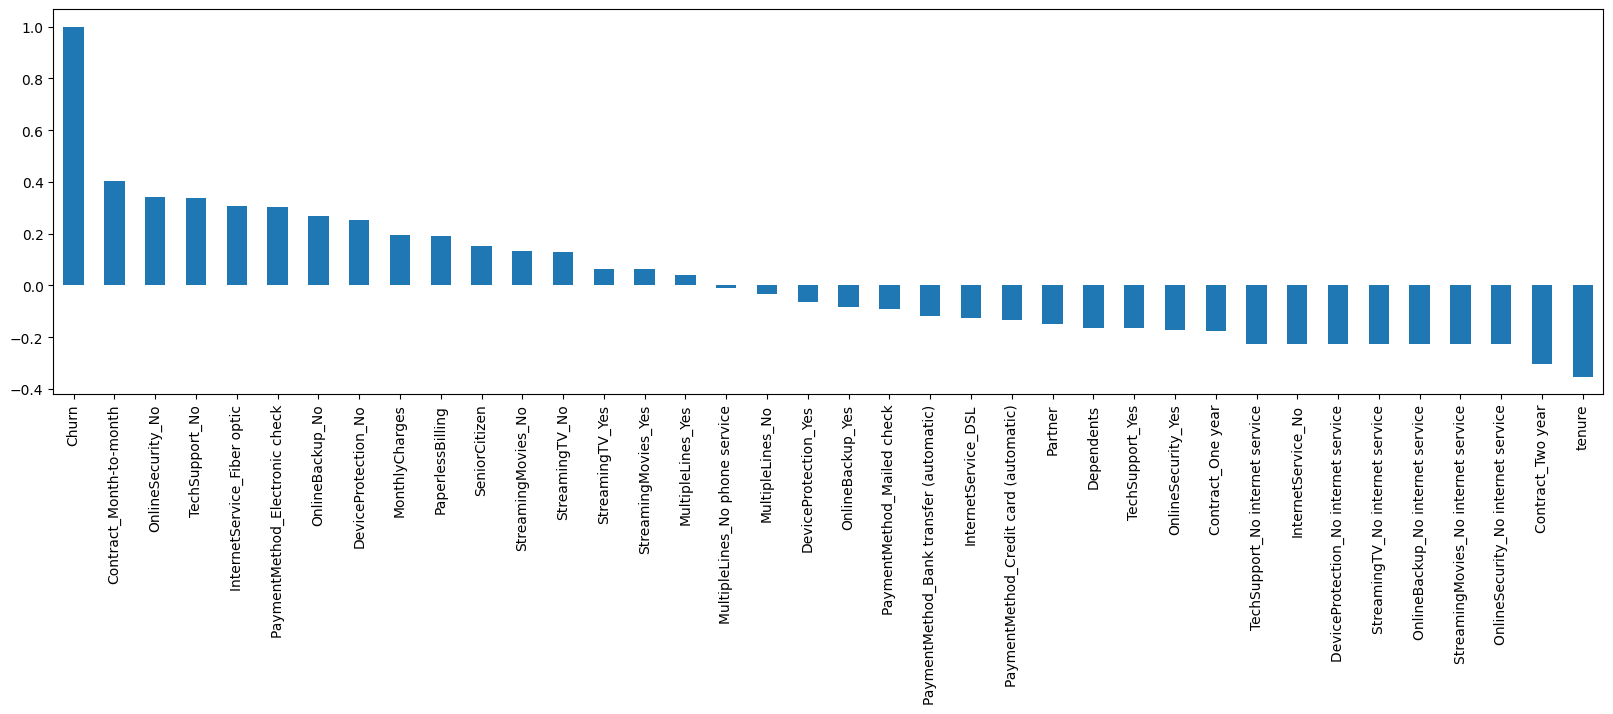

In [ ]:
plt.figure(figsize=(20,5))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
churn_counts = df1['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

In [ ]:
print("The ratio between retained customers and churners is",churn_ratio)
churn_counts

The ratio between retained customers and churners is 2.7683253076511503


0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from scipy.stats import uniform, randint
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = df1.copy()
X = df1.drop('Churn', axis = 1)
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
classifier_svm = SVC()
param_dist = {'C': uniform(0, 10),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': randint(1, 10),
              'gamma': ['scale', 'auto'] + list(uniform(0, 1).rvs(10))}

random_search = RandomizedSearchCV(classifier_svm, param_distributions=param_dist, n_iter = 10, cv=3)
random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))